In [35]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.datasets import mnist, fashion_mnist

In [2]:
## 1. 이미지 셋을 읽어오자.

In [3]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images.shape, train_labels.shape

((60000, 28, 28), (60000,))

In [36]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
train_images.shape, train_labels.shape

4431872/4422102 [==============================] - 0s 0us/step


((60000, 28, 28), (60000,))

In [38]:
train_images[0].shape

(28, 28)

In [39]:
train_labels[:5]

array([9, 0, 0, 3, 0], dtype=uint8)

In [40]:
test_images.shape, test_labels.shape

((10000, 28, 28), (10000,))

In [41]:
test_labels[:5]

array([9, 2, 1, 1, 6], dtype=uint8)

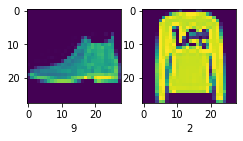

In [74]:
plt.figure(figsize=(10,10))
for x in range(2):
    plt.subplot(5, 5, x+1)
    plt.grid(False)
    plt.imshow(test_images[x])
    plt.xlabel(test_labels[x])
# fig, axs = plt.subplots(1, 2, figsize=(2,2))
# axs[0].imshow(test_images[0])
# axs[0].axis('off')
# axs[1].imshow(test_images[1])
# axs[1].axis('off')
# plt.show()

In [42]:
## 2. 이미지 전처리
## 1) 4차원을 만들어주세요.
##    - 이미지셋 자체는 3차원: 이미지2차원 + 이미지여러장
##    - 이미지 픽셀마다의 특성(특징)을 추출하는 처리를 하기 위한 차원하나더 추가
## 2) 데이터를 읽어왔을 때 픽셀마다의 값의 명암정도만 가지고 있음.(0~255)
##    - 0~1사이로 스케일링(표준화)시켜줌.
##    - 방법) 255로 나누어주면 됨.
## 3) 이미지는 크기가 아주 다양함. 크기를 표준화

In [43]:
train_images = train_images.reshape((60000, 28, 28, 1))
test_images = test_images.reshape((10000, 28, 28, 1))

In [44]:
train_images.shape

(60000, 28, 28, 1)

In [45]:
train_images, test_images = train_images / 255.0, test_images / 255.0 

In [46]:
## 3. 특성 추출처리 

In [47]:
model = Sequential()

In [48]:
model.add(Conv2D(32, (3,3), activation='sigmoid', input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3,3), activation='sigmoid'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3,3), activation='sigmoid'))

In [49]:
## 4. 특성추출한 결과를 학습데이터로 넣어서 학습할 예정.
##    deep modeling
##    1) 특성추출한 이미지 데이터를 1차원으로 만들어주세요.(Flatten())
##    2) 딥러닝 심층신경망(deep MLP)
##    3) fit()
model.add(Flatten()) ## 입력층
model.add(Dense(64, activation='sigmoid')) ## 히든층
model.add(Dense(10, activation='softmax')) ## 출력층

In [50]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 flatten_1 (Flatten)         (None, 576)              

In [51]:
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy']
             )

In [52]:
history = model.fit(train_images, train_labels, epochs=2, batch_size=100)
history

Epoch 1/2
600/600 [==============================] - 20s 33ms/step - loss: 1.2232 - accuracy: 0.5588
Epoch 2/2
600/600 [==============================] - 20s 33ms/step - loss: 0.6253 - accuracy: 0.7660


In [ ]:
## 5. 모델에 대해 평가
##    1) test데이터를 검증 => overfitting여부 확인!!!
##    2) 시각화로 평가

In [53]:
loss, acc = model.evaluate(test_images, test_labels, verbose=2)
loss, acc

313/313 - 1s - loss: 0.6030 - accuracy: 0.7750 - 663ms/epoch - 2ms/step


(0.603027880191803, 0.7749999761581421)

In [54]:
y_pred = model.predict(test_images)
y_pred[0]

array([1.0171251e-03, 2.5359893e-04, 3.8254098e-04, 1.1341802e-03,
       6.2022876e-04, 7.3609695e-02, 1.0684059e-03, 3.3835408e-01,
       1.3324183e-02, 5.7023591e-01], dtype=float32)

In [55]:
import numpy as np

In [56]:
y_pred0_index = np.argmax(y_pred[0]) 
y_pred0_index

9

In [57]:
y_pred_test = np.argmax(y_pred, axis= -1)
y_pred_test

array([9, 2, 1, ..., 8, 1, 5])

In [58]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

print(accuracy_score(test_labels, y_pred_test))
print(confusion_matrix(test_labels, y_pred_test))

0.775
[[744  12  39  88   6   2  95   0  14   0]
 [  1 935   7  33  10   1  12   0   1   0]
 [  6   3 593  11 155   0 224   0   8   0]
 [ 20  42  23 824  27   0  62   0   2   0]
 [  0   6 108  45 603   0 229   0   9   0]
 [  0   1   0   0   0 885   0  75   9  30]
 [170   7 173  63  92   0 472   0  23   0]
 [  0   0   0   0   0  62   0 813   0 125]
 [  1   3  31   5   4   4  22   3 925   2]
 [  0   0   0   0   0  16   0  27   1 956]]


In [59]:
type(confusion_matrix(test_labels, y_pred_test))

numpy.ndarray

In [60]:
result = confusion_matrix(test_labels, y_pred_test)
result.shape

(10, 10)

In [61]:
result[0][0], result[1][1]

(744, 935)

In [62]:
result_acc = []
for x in range(0, 10):
    result_acc.append(result[x][x])
result_acc

[744, 935, 593, 824, 603, 885, 472, 813, 925, 956]

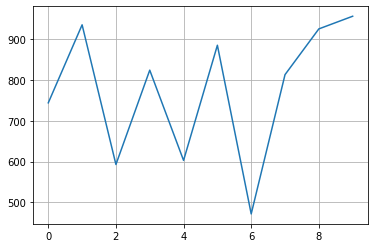

In [63]:
import matplotlib.pyplot as plt
plt.plot(result_acc)
plt.grid()
plt.show()

In [64]:
import pandas as pd

In [65]:
pd.Series(test_labels).value_counts()

9    1000
2    1000
1    1000
6    1000
4    1000
5    1000
7    1000
3    1000
8    1000
0    1000
dtype: int64

In [66]:
precision_score(test_labels, y_pred_test, average='weighted')

0.7780683789750082

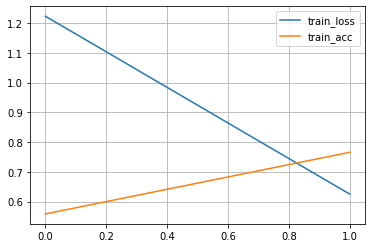

In [67]:
plt.plot(history.history['loss'])
#plt.plot(loss)
plt.plot(history.history['accuracy'])
#plt.plot(acc)
plt.legend(['train_loss', 'train_acc'])
plt.grid()
plt.show()

In [ ]:
model.predict